<a href="https://colab.research.google.com/github/guptankit005/Analytics/blob/master/Rapid_Prototyping_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
#importing and pandas and numpy
import pandas as pd
import numpy as np

In [56]:
#importing data from sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

#converting data into pandas dataframe
canc_data = pd.DataFrame(data.data, columns=data.feature_names)
canc_data['target'] = pd.Series(data.target)#adding target field to the dataset

In [57]:
#to show the first five rows of data
#canc_data.head()

#to get info about data
#canc_data.info()

#to check the presence of null values
#canc_data.isna().sum()

#to check for presence of duplicate values
#canc_data.duplicated().sum()

In [58]:
def classifier_prototyping(X,y):

  #splitting the dataset
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

  #importing all the classification libraries
  from sklearn.linear_model import LogisticRegression
  from sklearn.naive_bayes import GaussianNB
  from sklearn.svm import SVC
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.ensemble import AdaBoostClassifier
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
  from sklearn.metrics import log_loss
  import seaborn as sns
  import matplotlib.pyplot as plt


  classifier_names = [
  "Logistic Regression",
  "Naive Bayes",
  "Linear SVM",
  "KNN",
  "Decision Tree",
  "Random Forest",
  "AdaBoost"
  ]

  classifiers = [
  LogisticRegression(max_iter=3000),
  GaussianNB(), 
  SVC(kernel="linear", C=0.025),            
  KNeighborsClassifier(3),
  DecisionTreeClassifier(max_depth=5),
  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
  AdaBoostClassifier(),
  ]

  for i in range(0,7): 
    print('**********',classifier_names[i],'**********')
    print("Accuracy score on test: " , round((classifiers[i].fit(X_train, y_train).score(X_test, y_test)),3))
    print("Accuracy score on train: ", round((classifiers[i].fit(X_train, y_train).score(X_train, y_train)),3))
    y_pred = classifiers[i].fit(X_train, y_train).predict(X_test)
    #Precision Score = TP / (FP + TP)
    print('Precision: ', round(precision_score(y_test, y_pred),3))
    #Recall Score = TP / (FN + TP)
    print('Recall: ', round(recall_score(y_test, y_pred),3))
    #Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)
    #print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
    #F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score/)
    print('F1 Score: ' , round(f1_score(y_test, y_pred),3))
    #prinying log loss for the model
    print('log_loss : ', round(log_loss(y_test, y_pred),3))
       
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()
    print("---------------------------------------------------------------")
    print("")

In [59]:
#creating X and y
X_feature = list(canc_data.columns)
X_feature.remove('target')
X = canc_data[X_feature]

y = canc_data['target']

********** Logistic Regression **********
Accuracy score on test:  0.953
Accuracy score on train:  0.96
Precision:  0.952
Recall:  0.971
F1 Score:  0.961
log_loss :  1.616


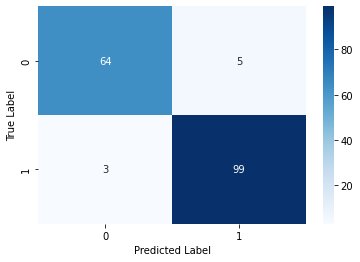

---------------------------------------------------------------

********** Naive Bayes **********
Accuracy score on test:  0.924
Accuracy score on train:  0.95
Precision:  0.908
Recall:  0.971
F1 Score:  0.938
log_loss :  2.626


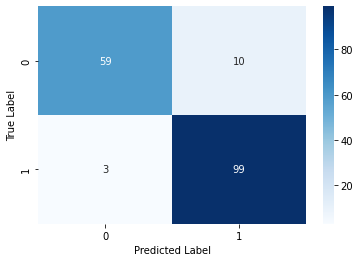

---------------------------------------------------------------

********** Linear SVM **********
Accuracy score on test:  0.947
Accuracy score on train:  0.955
Precision:  0.951
Recall:  0.961
F1 Score:  0.956
log_loss :  1.818


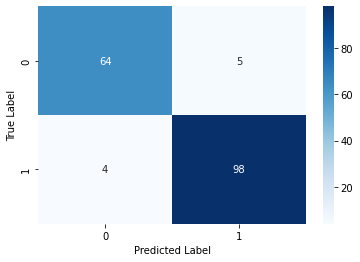

---------------------------------------------------------------

********** KNN **********
Accuracy score on test:  0.947
Accuracy score on train:  0.95
Precision:  0.951
Recall:  0.961
F1 Score:  0.956
log_loss :  1.818


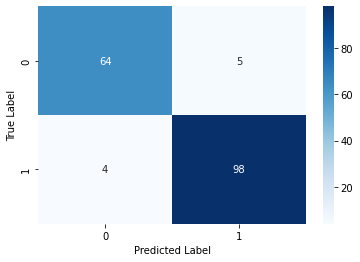

---------------------------------------------------------------

********** Decision Tree **********
Accuracy score on test:  0.942
Accuracy score on train:  0.995
Precision:  0.935
Recall:  0.98
F1 Score:  0.957
log_loss :  1.818


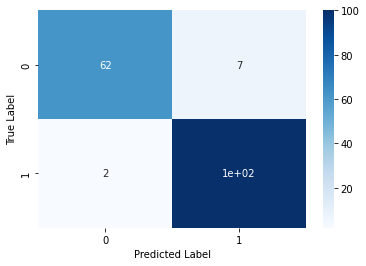

---------------------------------------------------------------

********** Random Forest **********
Accuracy score on test:  0.942
Accuracy score on train:  0.982
Precision:  0.927
Recall:  0.99
F1 Score:  0.957
log_loss :  1.818


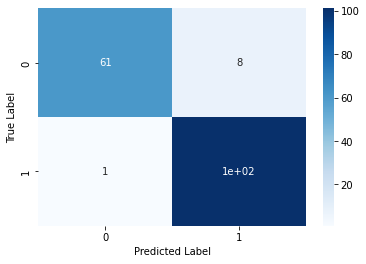

---------------------------------------------------------------

********** AdaBoost **********
Accuracy score on test:  0.965
Accuracy score on train:  1.0
Precision:  0.944
Recall:  1.0
F1 Score:  0.971
log_loss :  1.212


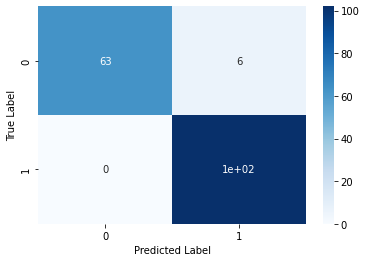

---------------------------------------------------------------



In [60]:
classifier_prototyping(X,y)